# Knowledge Globe NLP Topic Modeling Tool

### by Dr. Jeffrey R. Tharsen @ UChicago

## Run each code snippet, unless stated when you need to make changes.

Part 1.

In [1]:
# Part 1 : gensim LDA based on NLTK & SpaCy

# Run in python console
import nltk; nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junshuliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# For Shakespeare : We need to change this: kill thou, thy and shall & keep subject, re, edu and use
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words.extend(['from', 'thou', 'thy', 'shall', 'would'])  # make, come, go also very common


### Change your own corpus directory here.

In [4]:
# Import Dataset -- Computer

# Pull all into "data" = all Shakespeare raw text

# directory containing all source texts for training the model

# Change this to your corpus directory.
data_dir="Corpus Example 1 - Computer and Internet"

import glob, os
os.chdir(data_dir)

#documents = list()
data = list()   # reset data to 0

for filename in glob.glob("*.txt"):
    filedata = open(filename, 'r').read()
    print(filename + " = " + str(len(filedata)) + " chars")
    #documents = documents + filedata.split(".")
    data.append(filedata)


abstract_e_int_14.txt = 100947 chars
abstract_e_ARPANET_1984.txt = 1969 chars
abstract_e_World Wide Web_1979.txt = 0 chars
abstract_e_World Wide Web_1984.txt = 0 chars
abstract_e_ARPANET_1979.txt = 1697 chars
abstract_e_computer network_2019.txt = 71371 chars
abstract_e_comp_09.txt = 67720 chars
abstract_e_comp_19.txt = 75294 chars
abstract_e_computer network_2009.txt = 58952 chars
abstract_e_ARPANET_1969.txt = 0 chars
abstract_e_World Wide Web_1994.txt = 13430 chars
abstract_e_World Wide Web_1969.txt = 0 chars
abstract_e_ARPANET_1994.txt = 9642 chars
abstract_e_int_04.txt = 63234 chars
abstract_e_computer network_1969.txt = 57 chars
abstract_e_ARPANET_2009.txt = 29861 chars
abstract_e_comp_69.txt = 43201 chars
abstract_e_int_89.txt = 29779 chars
abstract_e_int_74.txt = 3308 chars
abstract_e_comp_94.txt = 47661 chars
abstract_e_computer network_1994.txt = 52165 chars
abstract_e_World Wide Web_2009.txt = 69820 chars
abstract_e_World Wide Web_2019.txt = 67654 chars
abstract_e_computer ne

In [5]:
data_dir

'Corpus Example 1 - Computer and Internet'

In [6]:
%%time

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])
print('\n')

[['using', 'internet', 'search', 'queries', 'for', 'infectious', 'disease', 'surveillance', 'screening', 'diseases', 'for', 'suitability', 'based', 'surveillance', 'systems', 'provide', 'novel', 'approach', 'to', 'monitoring', 'infectious', 'diseases', 'surveillance', 'systems', 'built', 'on', 'internet', 'data', 'are', 'economically', 'logistically', 'and', 'appealing', 'and', 'have', 'shown', 'significant', 'promise', 'the', 'potential', 'for', 'these', 'systems', 'has', 'increased', 'with', 'increased', 'internet', 'availability', 'and', 'shifts', 'in', 'health', 'related', 'information', 'seeking', 'behaviour', 'this', 'approach', 'to', 'monitoring', 'infectious', 'diseases', 'has', 'however', 'only', 'been', 'applied', 'to', 'single', 'or', 'small', 'groups', 'of', 'select', 'diseases', 'this', 'study', 'aims', 'to', 'systematically', 'investigate', 'the', 'potential', 'for', 'developing', 'surveillance', 'and', 'early', 'warning', 'systems', 'using', 'internet', 'search', 'data',

In [7]:
%%time

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])
print('\n')

['using', 'internet', 'search', 'queries', 'for', 'infectious', 'disease', 'surveillance', 'screening', 'diseases', 'for', 'suitability', 'based', 'surveillance', 'systems', 'provide', 'novel', 'approach', 'to', 'monitoring', 'infectious_diseases', 'surveillance', 'systems', 'built', 'on', 'internet', 'data', 'are', 'economically', 'logistically', 'and', 'appealing', 'and', 'have', 'shown', 'significant', 'promise', 'the', 'potential', 'for', 'these', 'systems', 'has', 'increased', 'with', 'increased', 'internet', 'availability', 'and', 'shifts', 'in', 'health', 'related', 'information', 'seeking', 'behaviour', 'this', 'approach', 'to', 'monitoring', 'infectious_diseases', 'has', 'however', 'only', 'been', 'applied', 'to', 'single', 'or', 'small', 'groups', 'of', 'select', 'diseases', 'this', 'study', 'aims', 'to', 'systematically', 'investigate', 'the', 'potential', 'for', 'developing', 'surveillance', 'and', 'early', 'warning', 'systems', 'using', 'internet', 'search', 'data', 'for',

In [8]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [9]:
%%time
# This cell takes 2-3 minutes to run on my machine.  -j

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#print(data_lemmatized[:1])
print(data_lemmatized)
print('\n')

[['use', 'internet', 'search', 'query', 'infectious', 'disease', 'surveillance', 'screening', 'disease', 'suitability', 'base', 'surveillance', 'system', 'provide', 'novel', 'approach', 'monitor', 'infectious_diseas', 'surveillance', 'system', 'build', 'internet', 'datum', 'economically', 'logistically', 'appeal', 'show', 'significant', 'promise', 'potential', 'system', 'increase', 'increase', 'internet', 'availability', 'shift', 'health', 'relate', 'information', 'seek', 'behaviour', 'approach', 'monitor', 'infectious_diseas', 'however', 'apply', 'single', 'small', 'group', 'select', 'disease', 'study', 'aim', 'systematically', 'investigate', 'potential', 'develop', 'surveillance', 'early', 'warning', 'system', 'use', 'internet', 'search', 'datum', 'wide_range', 'infectious_diseas', 'methodsofficial', 'notification', 'infectious_diseas', 'australia', 'download', 'correlate', 'frequency', 'internet', 'search', 'term', 'period', 'use', 'spearman', 'rank', 'correlation', 'time', 'series'

In [10]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 3), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 4), (11, 5), (12, 1), (13, 10), (14, 3), (15, 4), (16, 3), (17, 3), (18, 1), (19, 4), (20, 1), (21, 5), (22, 2), (23, 2), (24, 1), (25, 3), (26, 10), (27, 1), (28, 1), (29, 7), (30, 2), (31, 1), (32, 2), (33, 2), (34, 1), (35, 2), (36, 11), (37, 4), (38, 1), (39, 9), (40, 1), (41, 3), (42, 1), (43, 2), (44, 2), (45, 1), (46, 3), (47, 1), (48, 2), (49, 2), (50, 6), (51, 1), (52, 1), (53, 1), (54, 4), (55, 2), (56, 1), (57, 11), (58, 1), (59, 1), (60, 2), (61, 1), (62, 1), (63, 8), (64, 2), (65, 2), (66, 4), (67, 1), (68, 1), (69, 1), (70, 1), (71, 16), (72, 1), (73, 1), (74, 2), (75, 6), (76, 1), (77, 1), (78, 5), (79, 4), (80, 3), (81, 1), (82, 3), (83, 1), (84, 1), (85, 17), (86, 5), (87, 3), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 4), (97, 1), (98, 37), (99, 1), (100, 7), (101, 3), (102, 1), (103, 1), (104, 2), (105, 1), (106, 1), (107, 1), (108, 4), (109, 1), (

In [11]:
id2word[0]

'abcc'

In [12]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abcc', 3),
  ('ability', 1),
  ('able', 2),
  ('abnormal', 1),
  ('abnormality', 1),
  ('absolu', 1),
  ('absolute', 1),
  ('abstract', 3),
  ('acc', 1),
  ('accelerate', 1),
  ('accelerater', 4),
  ('acceleration', 5),
  ('accelerometer', 1),
  ('access', 10),
  ('accessible', 3),
  ('accord', 4),
  ('accordingly', 3),
  ('account', 3),
  ('accumulate', 1),
  ('accuracy', 4),
  ('accurate', 1),
  ('achieve', 5),
  ('acid', 2),
  ('acquise', 2),
  ('act', 1),
  ('actigraph', 3),
  ('active', 10),
  ('actively', 1),
  ('activism', 1),
  ('activity', 7),
  ('actrn', 2),
  ('actual', 1),
  ('adapt', 2),
  ('adaptive', 2),
  ('adc', 1),
  ('add', 2),
  ('addition', 11),
  ('additional', 4),
  ('additionally', 1),
  ('address', 9),
  ('adequately', 1),
  ('adherence', 3),
  ('adjacent', 1),
  ('adjust', 2),
  ('adjustment', 2),
  ('administer', 1),
  ('administration', 3),
  ('administrative', 1),
  ('adolescent', 2),
  ('adopt', 2),
  ('adult', 6),
  ('adulte', 1),
  ('advanced', 1),
 

In [13]:
%%time

### Much as we saw with Word2vec, these settings are the key to tuning your LDA Topic Model. ###

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

CPU times: user 20.4 s, sys: 115 ms, total: 20.5 s
Wall time: 5.24 s


In [14]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.001*"use" + 0.001*"system" + 0.000*"base" + 0.000*"datum" + 0.000*"model" '
  '+ 0.000*"study" + 0.000*"network" + 0.000*"information" + 0.000*"provide" + '
  '0.000*"paper"'),
 (1,
  '0.029*"network" + 0.013*"computer" + 0.009*"system" + 0.008*"service" + '
  '0.008*"protocol" + 0.007*"communication" + 0.007*"paper" + '
  '0.006*"development" + 0.005*"control" + 0.005*"discuss"'),
 (2,
  '0.010*"problem" + 0.009*"use" + 0.008*"system" + 0.008*"algorithm" + '
  '0.006*"base" + 0.006*"model" + 0.006*"object" + 0.005*"computer" + '
  '0.005*"paper" + 0.005*"student"'),
 (3,
  '0.021*"network" + 0.013*"system" + 0.008*"use" + 0.008*"base" + '
  '0.007*"problem" + 0.006*"protocol" + 0.006*"paper" + 0.006*"propose" + '
  '0.006*"service" + 0.005*"performance"'),
 (4,
  '0.011*"use" + 0.007*"system" + 0.007*"base" + 0.006*"datum" + '
  '0.006*"network" + 0.006*"study" + 0.005*"model" + 0.005*"information" + '
  '0.004*"method" + 0.004*"result"'),
 (5,
  '0.009*"die" + 0.008*"der" +

In [15]:
%%time

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
print('\n')


Perplexity:  -8.306370645118983

Coherence Score:  0.3675982970887805


CPU times: user 2.31 s, sys: 142 ms, total: 2.45 s
Wall time: 6.57 s


In [16]:
%%time

# Visualize the topics
#
# If you get an error like this: "pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. 
# A future version of pandas will change to not sort by default."
#
# then from the command line do: "pip install pandas==0.21.0"

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)  # sort=False ? sort=True
vis
print('\n')

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))




CPU times: user 787 ms, sys: 167 ms, total: 954 ms
Wall time: 6.25 s


In [17]:
sort=False

In [18]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.100770 -0.039556       1        1  61.562069
3      0.199606 -0.044196       2        1  12.205637
6      0.141381  0.004433       3        1   8.631132
13     0.135260  0.000142       4        1   5.069003
11     0.039204  0.131356       5        1   3.003408
2      0.080025 -0.000803       6        1   2.470012
5     -0.041552  0.154623       7        1   2.134590
14     0.027086  0.006307       8        1   1.712629
1      0.026407 -0.055671       9        1   1.497748
12    -0.107092 -0.070642      10        1   1.037029
8     -0.038506 -0.047417      11        1   0.674292
7     -0.131526 -0.009442      12        1   0.000635
9     -0.138389 -0.011678      13        1   0.000621
0     -0.145058 -0.009813      14        1   0.000604
10    -0.147615 -0.007643      15        1   0.000601, topic_info=      Category         Freq           Term        Total  loglift  logprob
term                                                                     
1429   Default  1539.000000        network  1539.000000  30.0000  30.0000
2310   Default  1715.000000            use  1715.000000  29.0000  29.0000
2152   Default  1522.000000         system  1522.000000  28.0000  28.0000
405    Default   569.000000       computer   569.000000  27.0000  27.0000
527    Default   962.000000          datum   962.000000  26.0000  26.0000
195    Default  1132.000000           base  1132.000000  25.0000  25.0000
1370   Default   872.000000          model   872.000000  24.0000  24.0000
2111   Default   850.000000          study   850.000000  23.0000  23.0000
1528   Default   725.000000          paper   725.000000  22.0000  22.0000
1689   Default   605.000000        problem   605.000000  21.0000  21.0000
1978   Default   473.000000        service   473.000000  20.0000  20.0000
1329   Default   653.000000         method   653.000000  19.0000  19.0000
75     Default   561.000000      algorithm   561.000000  18.0000  18.0000
470    Default   419.000000        control   419.000000  17.0000  17.0000
1876   Default   652.000000         result   652.000000  16.0000  16.0000
1715   Default   183.000000        protein   183.000000  15.0000  15.0000
1085   Default   756.000000    information   756.000000  14.0000  14.0000
389    Default   400.000000  communication   400.000000  13.0000  13.0000
1128   Default   490.000000       internet   490.000000  12.0000  12.0000
558    Default   479.000000         design   479.000000  11.0000  11.0000
1716   Default   372.000000       protocol   372.000000  10.0000  10.0000
1718   Default   574.000000        provide   574.000000   9.0000   9.0000
123    Default   519.000000    application   519.000000   8.0000   8.0000
2215   Default   480.000000           time   480.000000   7.0000   7.0000
2432   Default   347.000000            der   347.000000   6.0000   6.0000
2433   Default   327.000000            die   327.000000   5.0000   5.0000
98     Default   529.000000       analysis   529.000000   4.0000   4.0000
1691   Default   392.000000        process   392.000000   3.0000   3.0000
1995   Default   511.000000           show   511.000000   2.0000   2.0000
2374   Default   410.000000            web   410.000000   1.0000   1.0000
...        ...          ...            ...          ...      ...      ...
11427  Topic15     0.000070      erzeugung     2.217574   1.6556  -9.6513
126    Topic15     0.000290       approach   495.621613  -2.3302  -8.2278
11686  Topic15     0.000069        turcica     2.218447   1.6489  -9.6577
2111   Topic15     0.000324          study   850.208618  -2.7580  -8.1159
1876   Topic15     0.000303         result   652.582581  -2.5604  -8.1828
1085   Topic15     0.000311    information   756.738708  -2.6821  -8.1565
935    Topic15     0.000237           give   258.262970  -1.8805  -8.4299
1718   Topic15     0.000285        provide   574.307861  -2.4938  -8.2441
2251 

Part 2.

In [19]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!


In [20]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.024*"der" + 0.021*"die" + 0.019*"und" + 0.007*"eine" + 0.006*"das" + '
  '0.005*"den" + 0.005*"system" + 0.005*"fur" + 0.005*"computer" + '
  '0.004*"werden"'),
 (1,
  '0.012*"network" + 0.011*"use" + 0.011*"system" + 0.008*"base" + '
  '0.006*"datum" + 0.006*"model" + 0.005*"paper" + 0.005*"study" + '
  '0.004*"problem" + 0.004*"information"'),
 (2,
  '0.007*"protein" + 0.005*"sequence" + 0.004*"cell" + 0.003*"enzyme" + '
  '0.003*"protease" + 0.003*"function" + 0.003*"la" + 0.002*"structure" + '
  '0.002*"inhibitor" + 0.002*"activation"'),
 (3,
  '0.011*"use" + 0.009*"study" + 0.006*"patient" + 0.005*"gene" + '
  '0.005*"analysis" + 0.005*"datum" + 0.005*"base" + 0.005*"information" + '
  '0.004*"web" + 0.004*"intervention"')]


In [21]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,10), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             3.0            0.672569   
1            1             0.0            0.545323   
2            2             0.0            0.250000   
3            3             0.0            0.250000   
4            4             1.0            0.994676   
5            5             1.0            0.999876   
6            6             3.0            0.736177   
7            7             1.0            0.790406   
8            8             1.0            0.967478   
9            9             0.0            0.250000   

                                            Keywords  \
0  use, study, patient, gene, analysis, datum, ba...   
1  der, die, und, eine, das, den, system, fur, co...   
2  der, die, und, eine, das, den, system, fur, co...   
3  der, die, und, eine, das, den, system, fur, co...   
4  network, use, system, base, datum, model, pape...   
5  network, use, system, base, datum, model, pape...   
6  use, study, patient, gene, analysis, datum, ba...   
7  network, use, system, base, datum, model, pape...   
8  network, use, system, base, datum, model, pape...   
9  der, die, und, eine, das, den, system, fur, co...   

                                                Text  
0  [use, internet, search, query, infectious, dis...  
1  [rout, flow, allocation, state, previous, chap...  
2                                                 []  
3                                                 []  
4  [message, service, computer, network, paper, d...  
5  [component, base, metric, evaluate, availabili...  
6  [organization, wide, adoption, computerized, p...  
7  [regressive, effect, regulation, regulation, h...  
8  [problem, solve, low, datum, throughput, mobil...  
9                                                 []

In [22]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0        0.0            0.887561   
1        1.0            0.999882   
2        2.0            0.623621   
3        3.0            0.736177   

                                                                                    Keywords  \
0                               der, die, und, eine, das, den, system, fur, computer, werden   
1               network, use, system, base, datum, model, paper, study, problem, information   
2  protein, sequence, cell, enzyme, protease, function, la, structure, inhibitor, activation   
3           use, study, patient, gene, analysis, datum, base, information, web, intervention   

                                                                                   Representative Text  
0  [service, system, parallel, queue, early, paper, certain, service, system, investigate, present,...  
1  [assessment, tool, service, take, small, island, state, context, service, help, foster, developm...  
2  [darpa, activity, packet, network, interconnection, fundamental, premise, current, command, cont...  
3  [organization, wide, adoption, computerized, provider, order, entry, system, study, base, diffus...

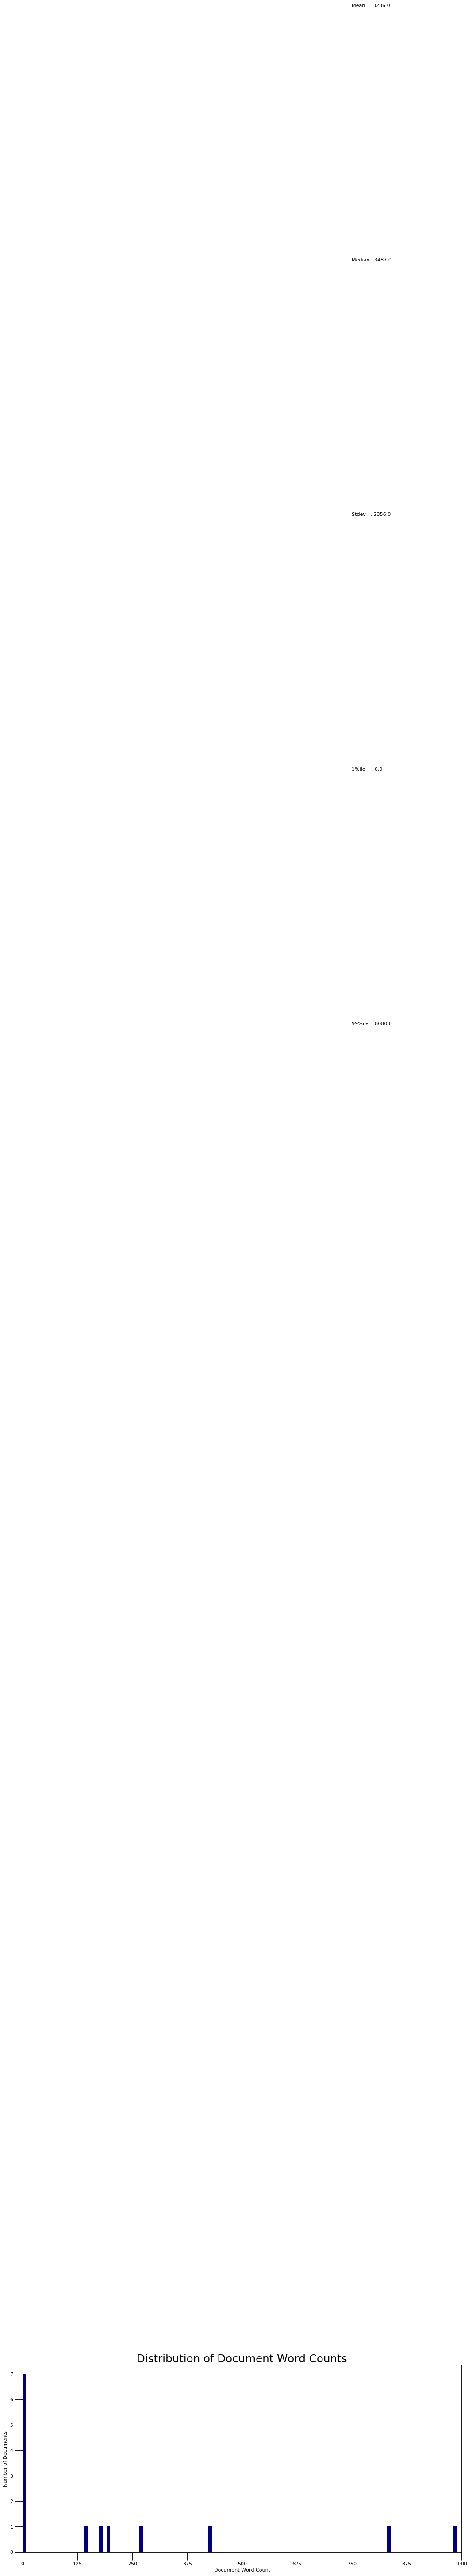

In [23]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=80)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value enc

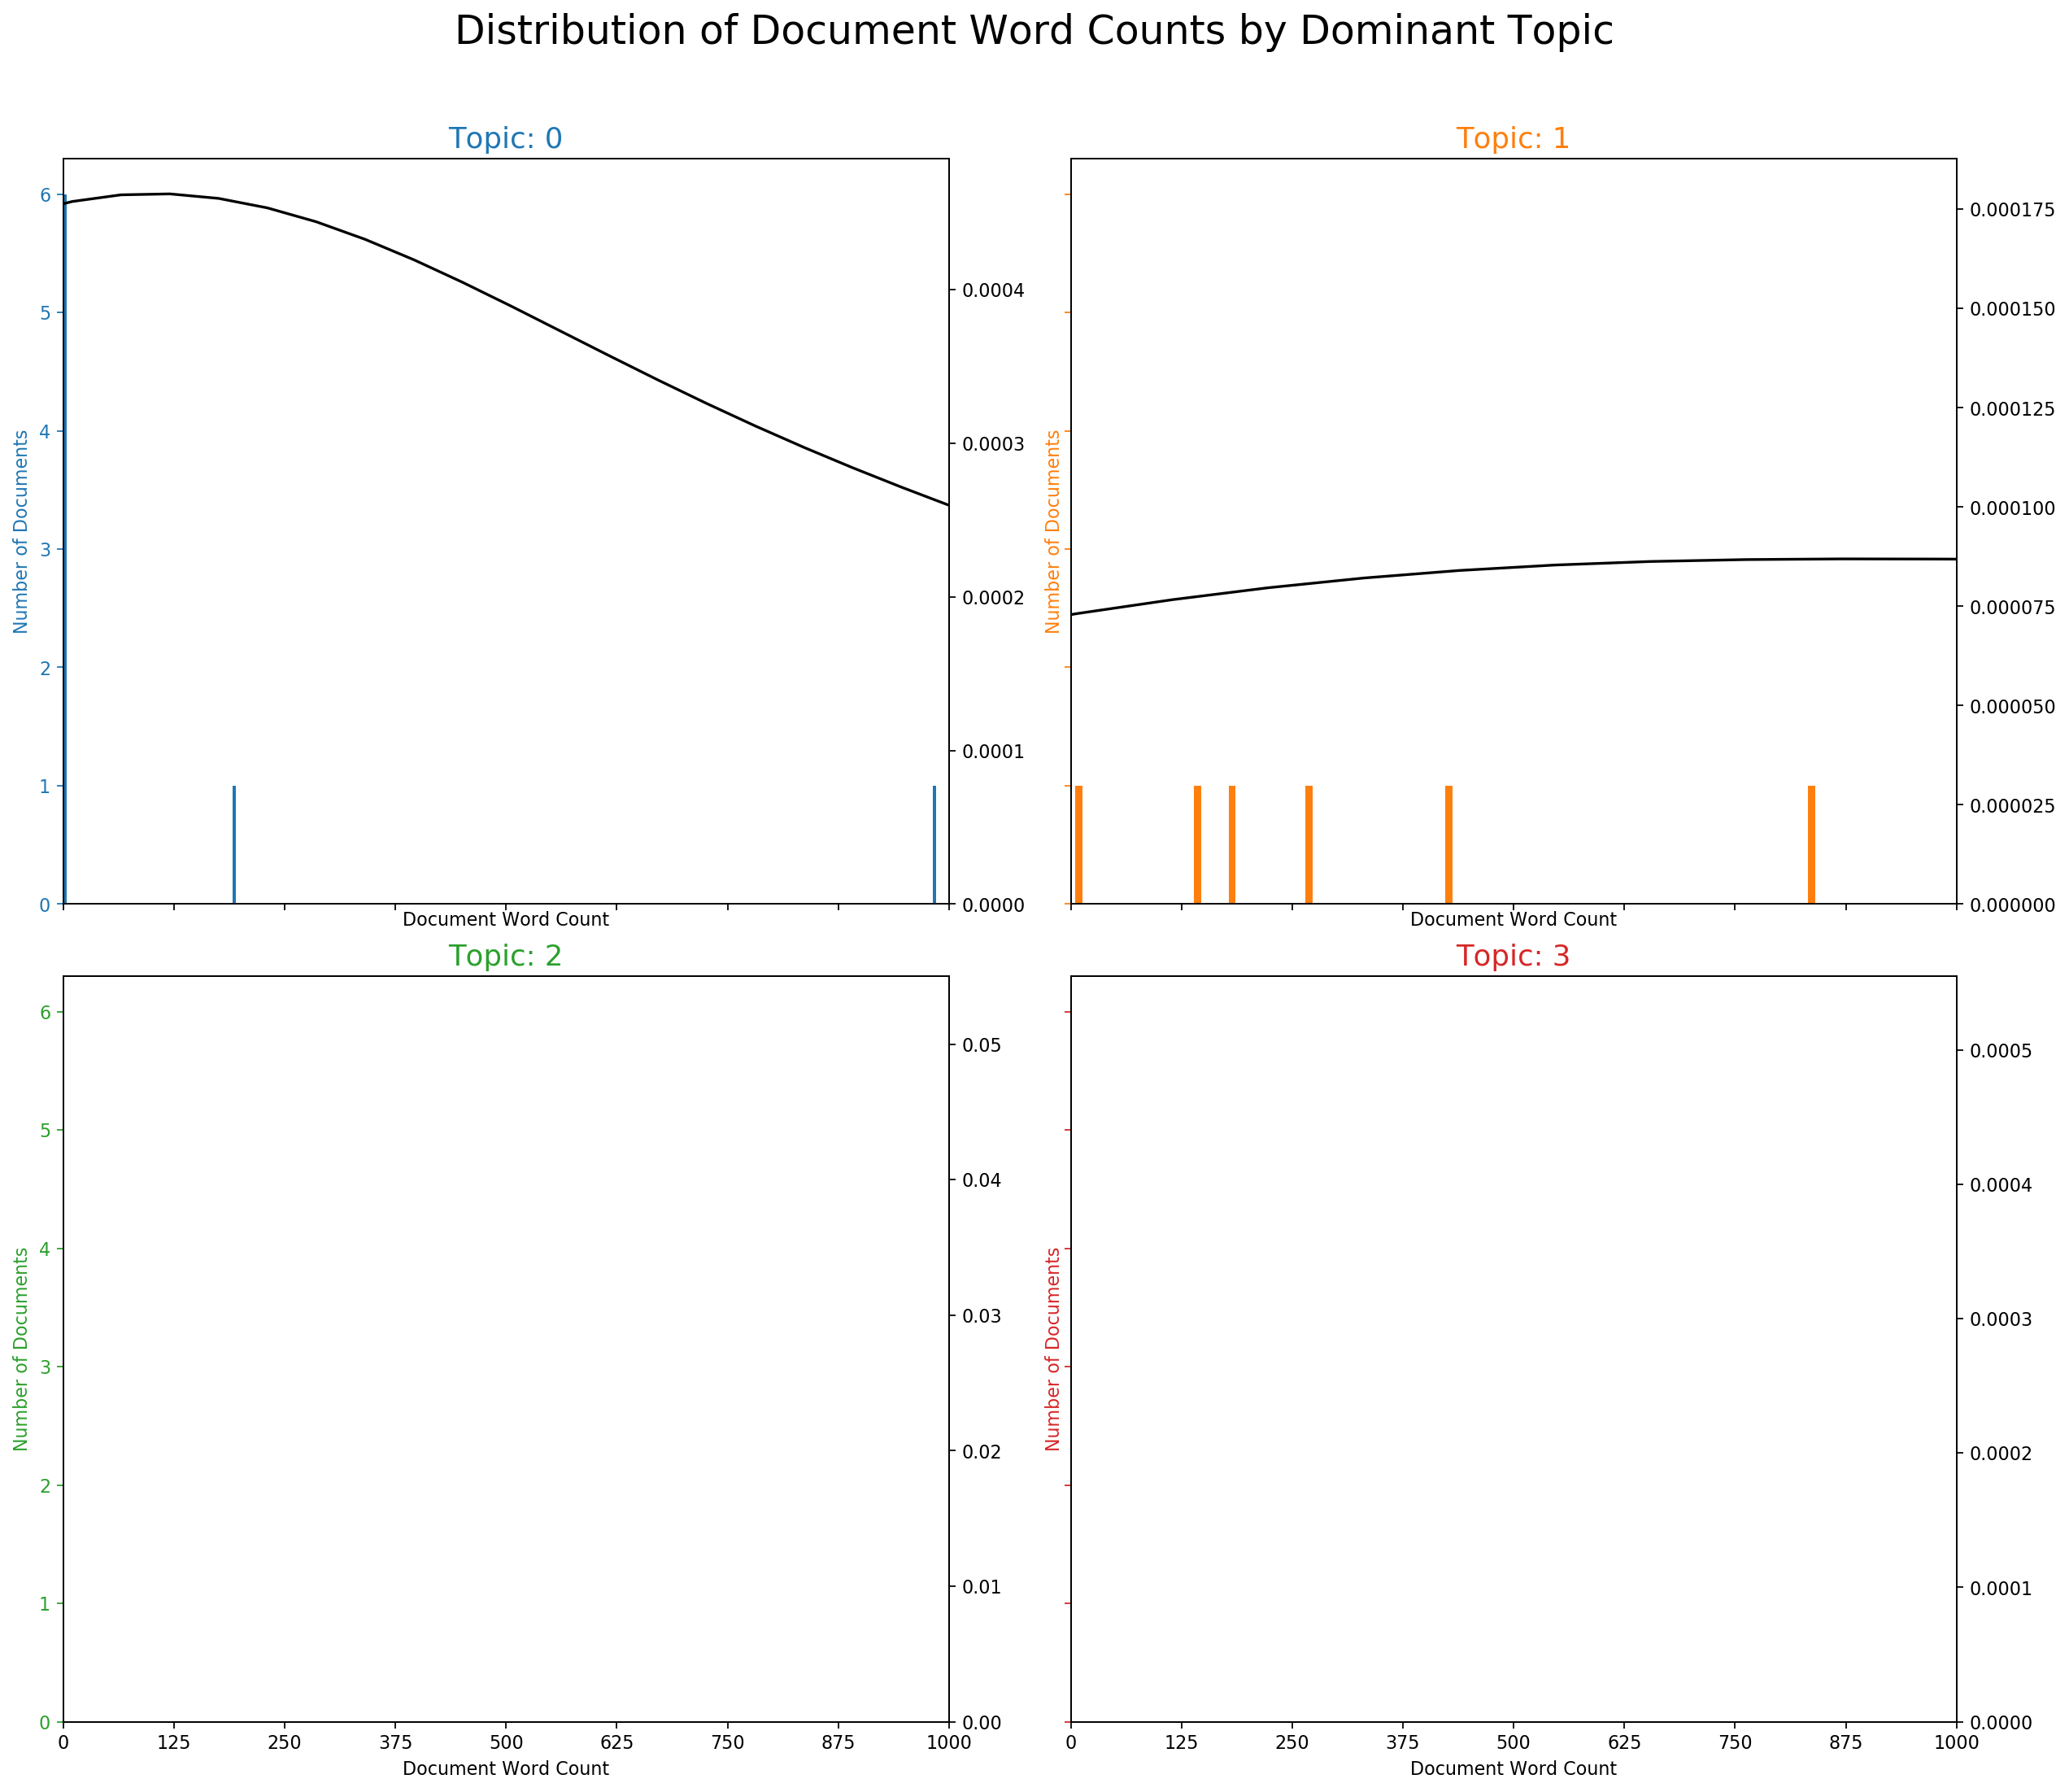

In [24]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

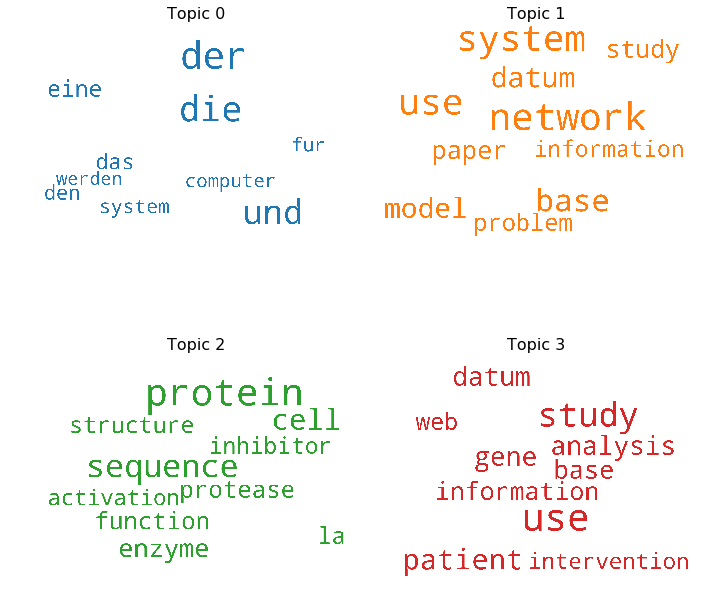

In [25]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

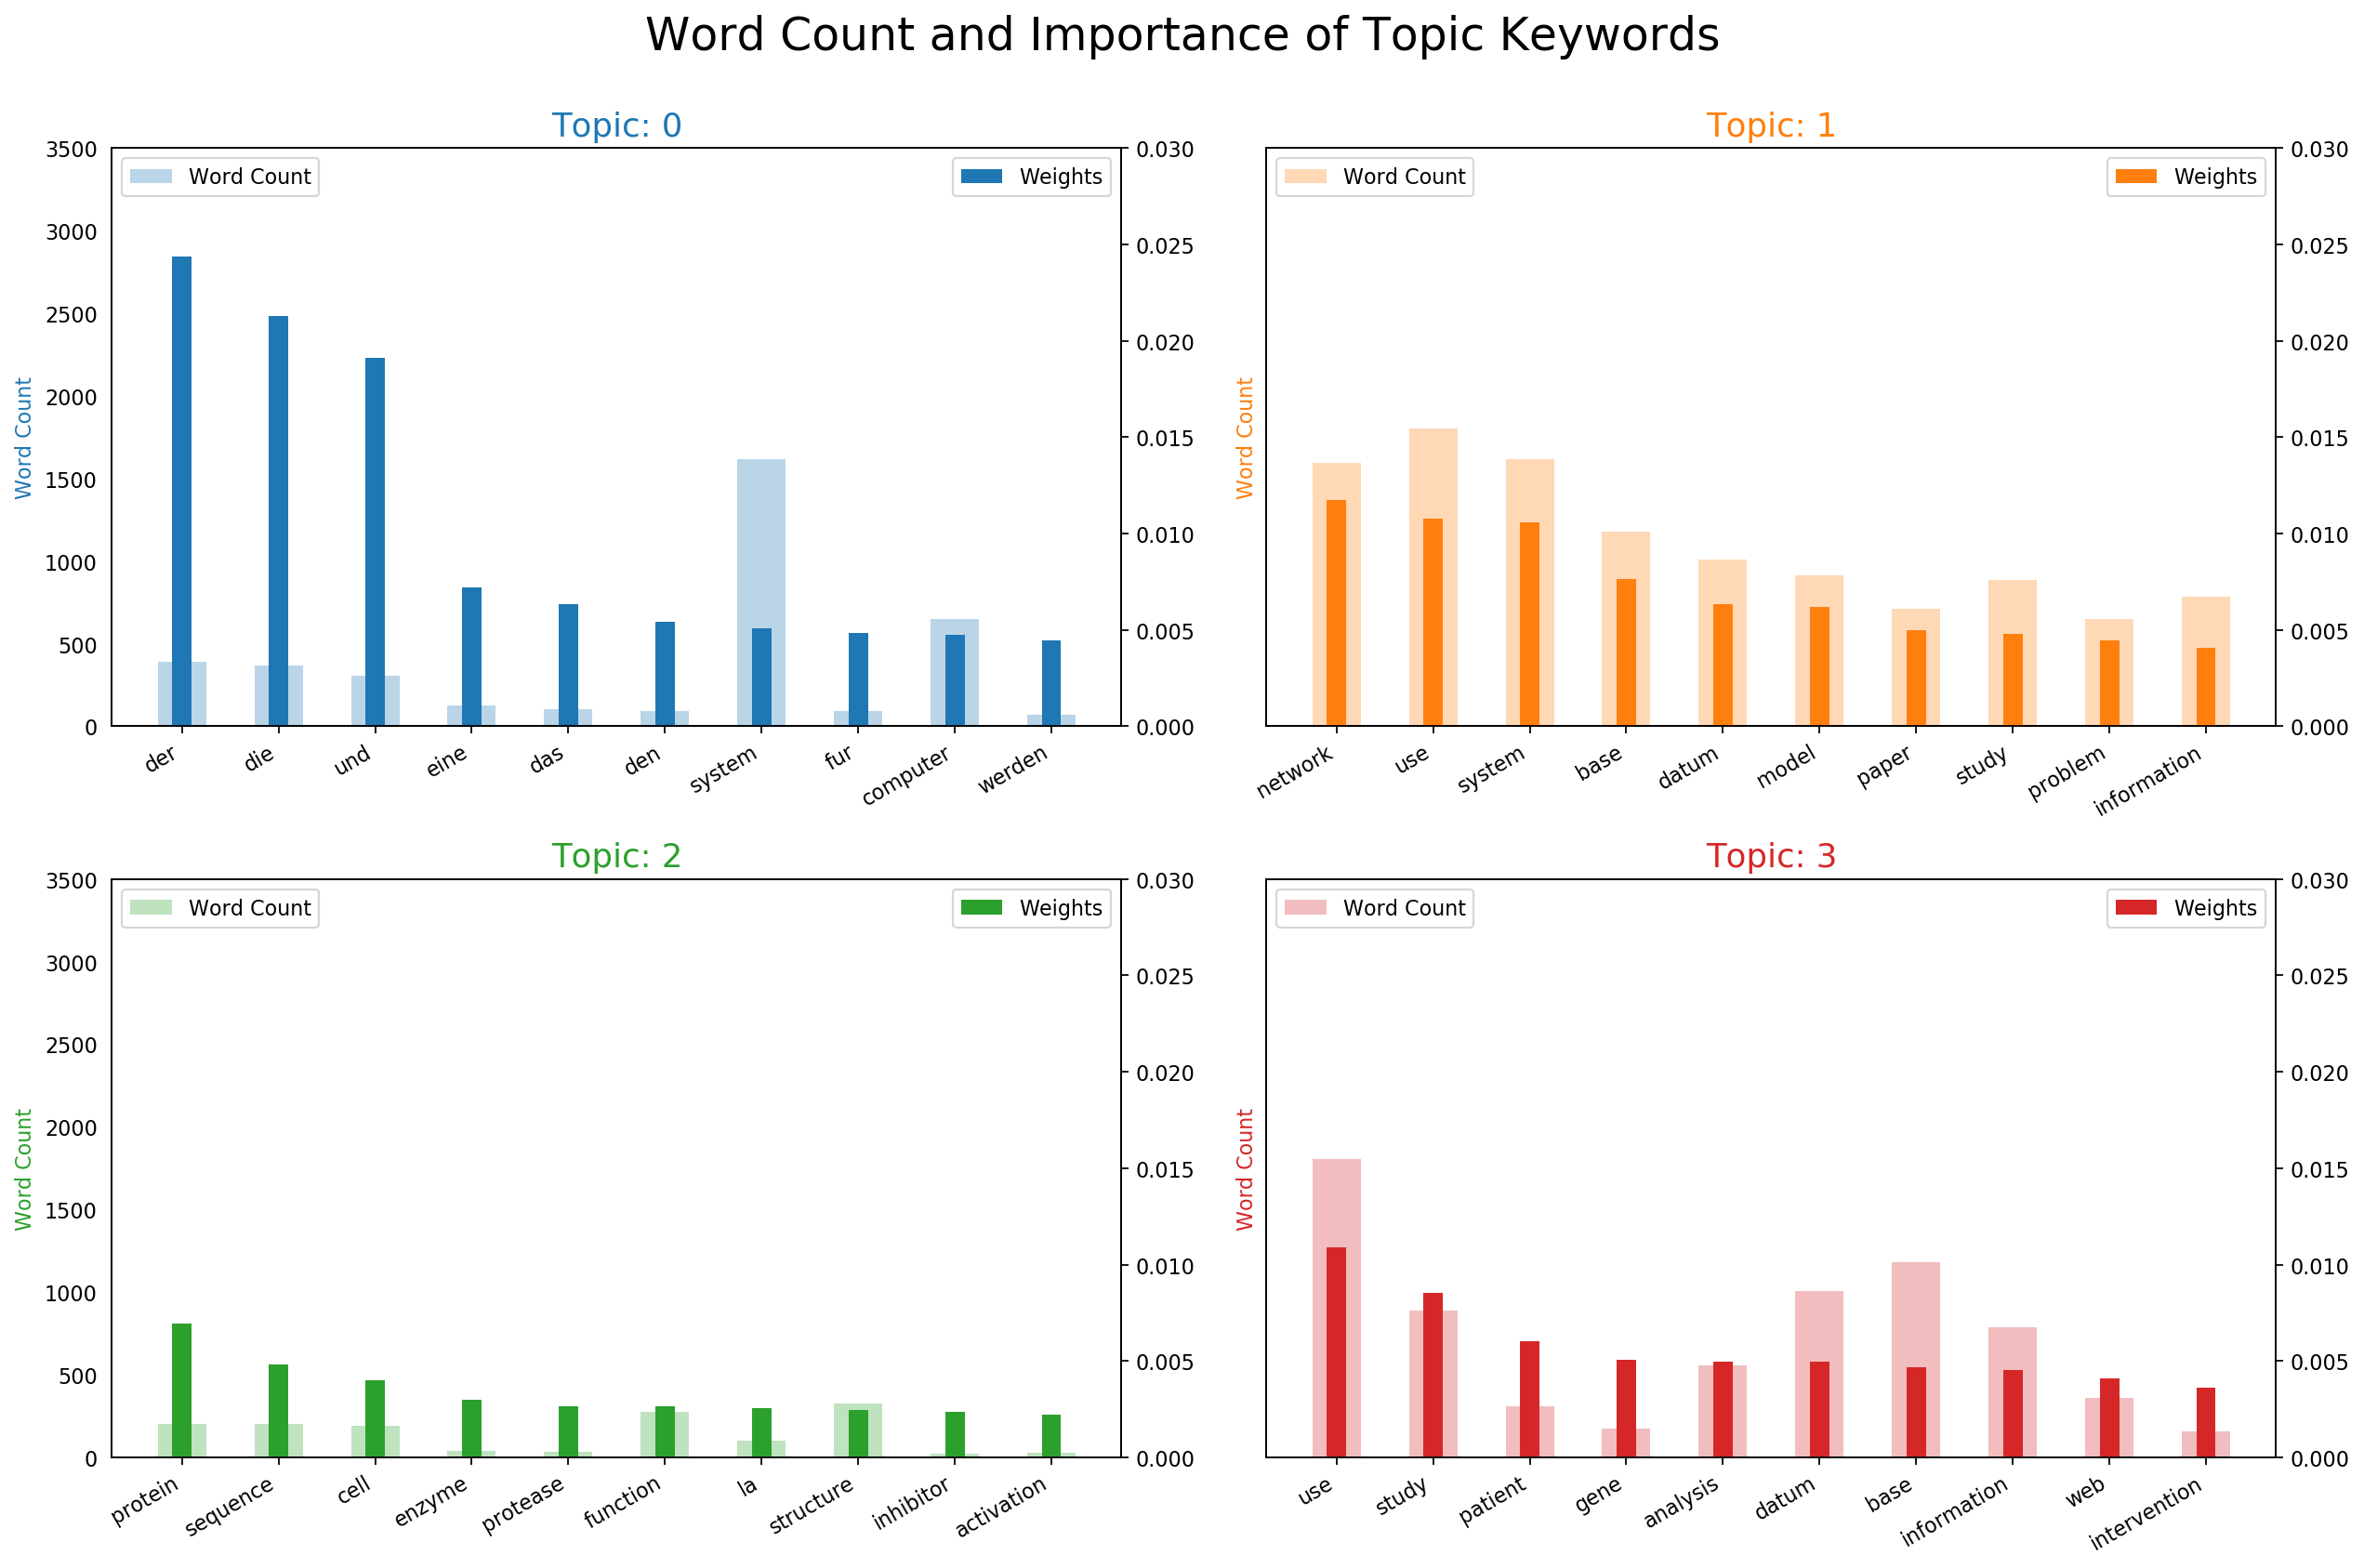

In [26]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

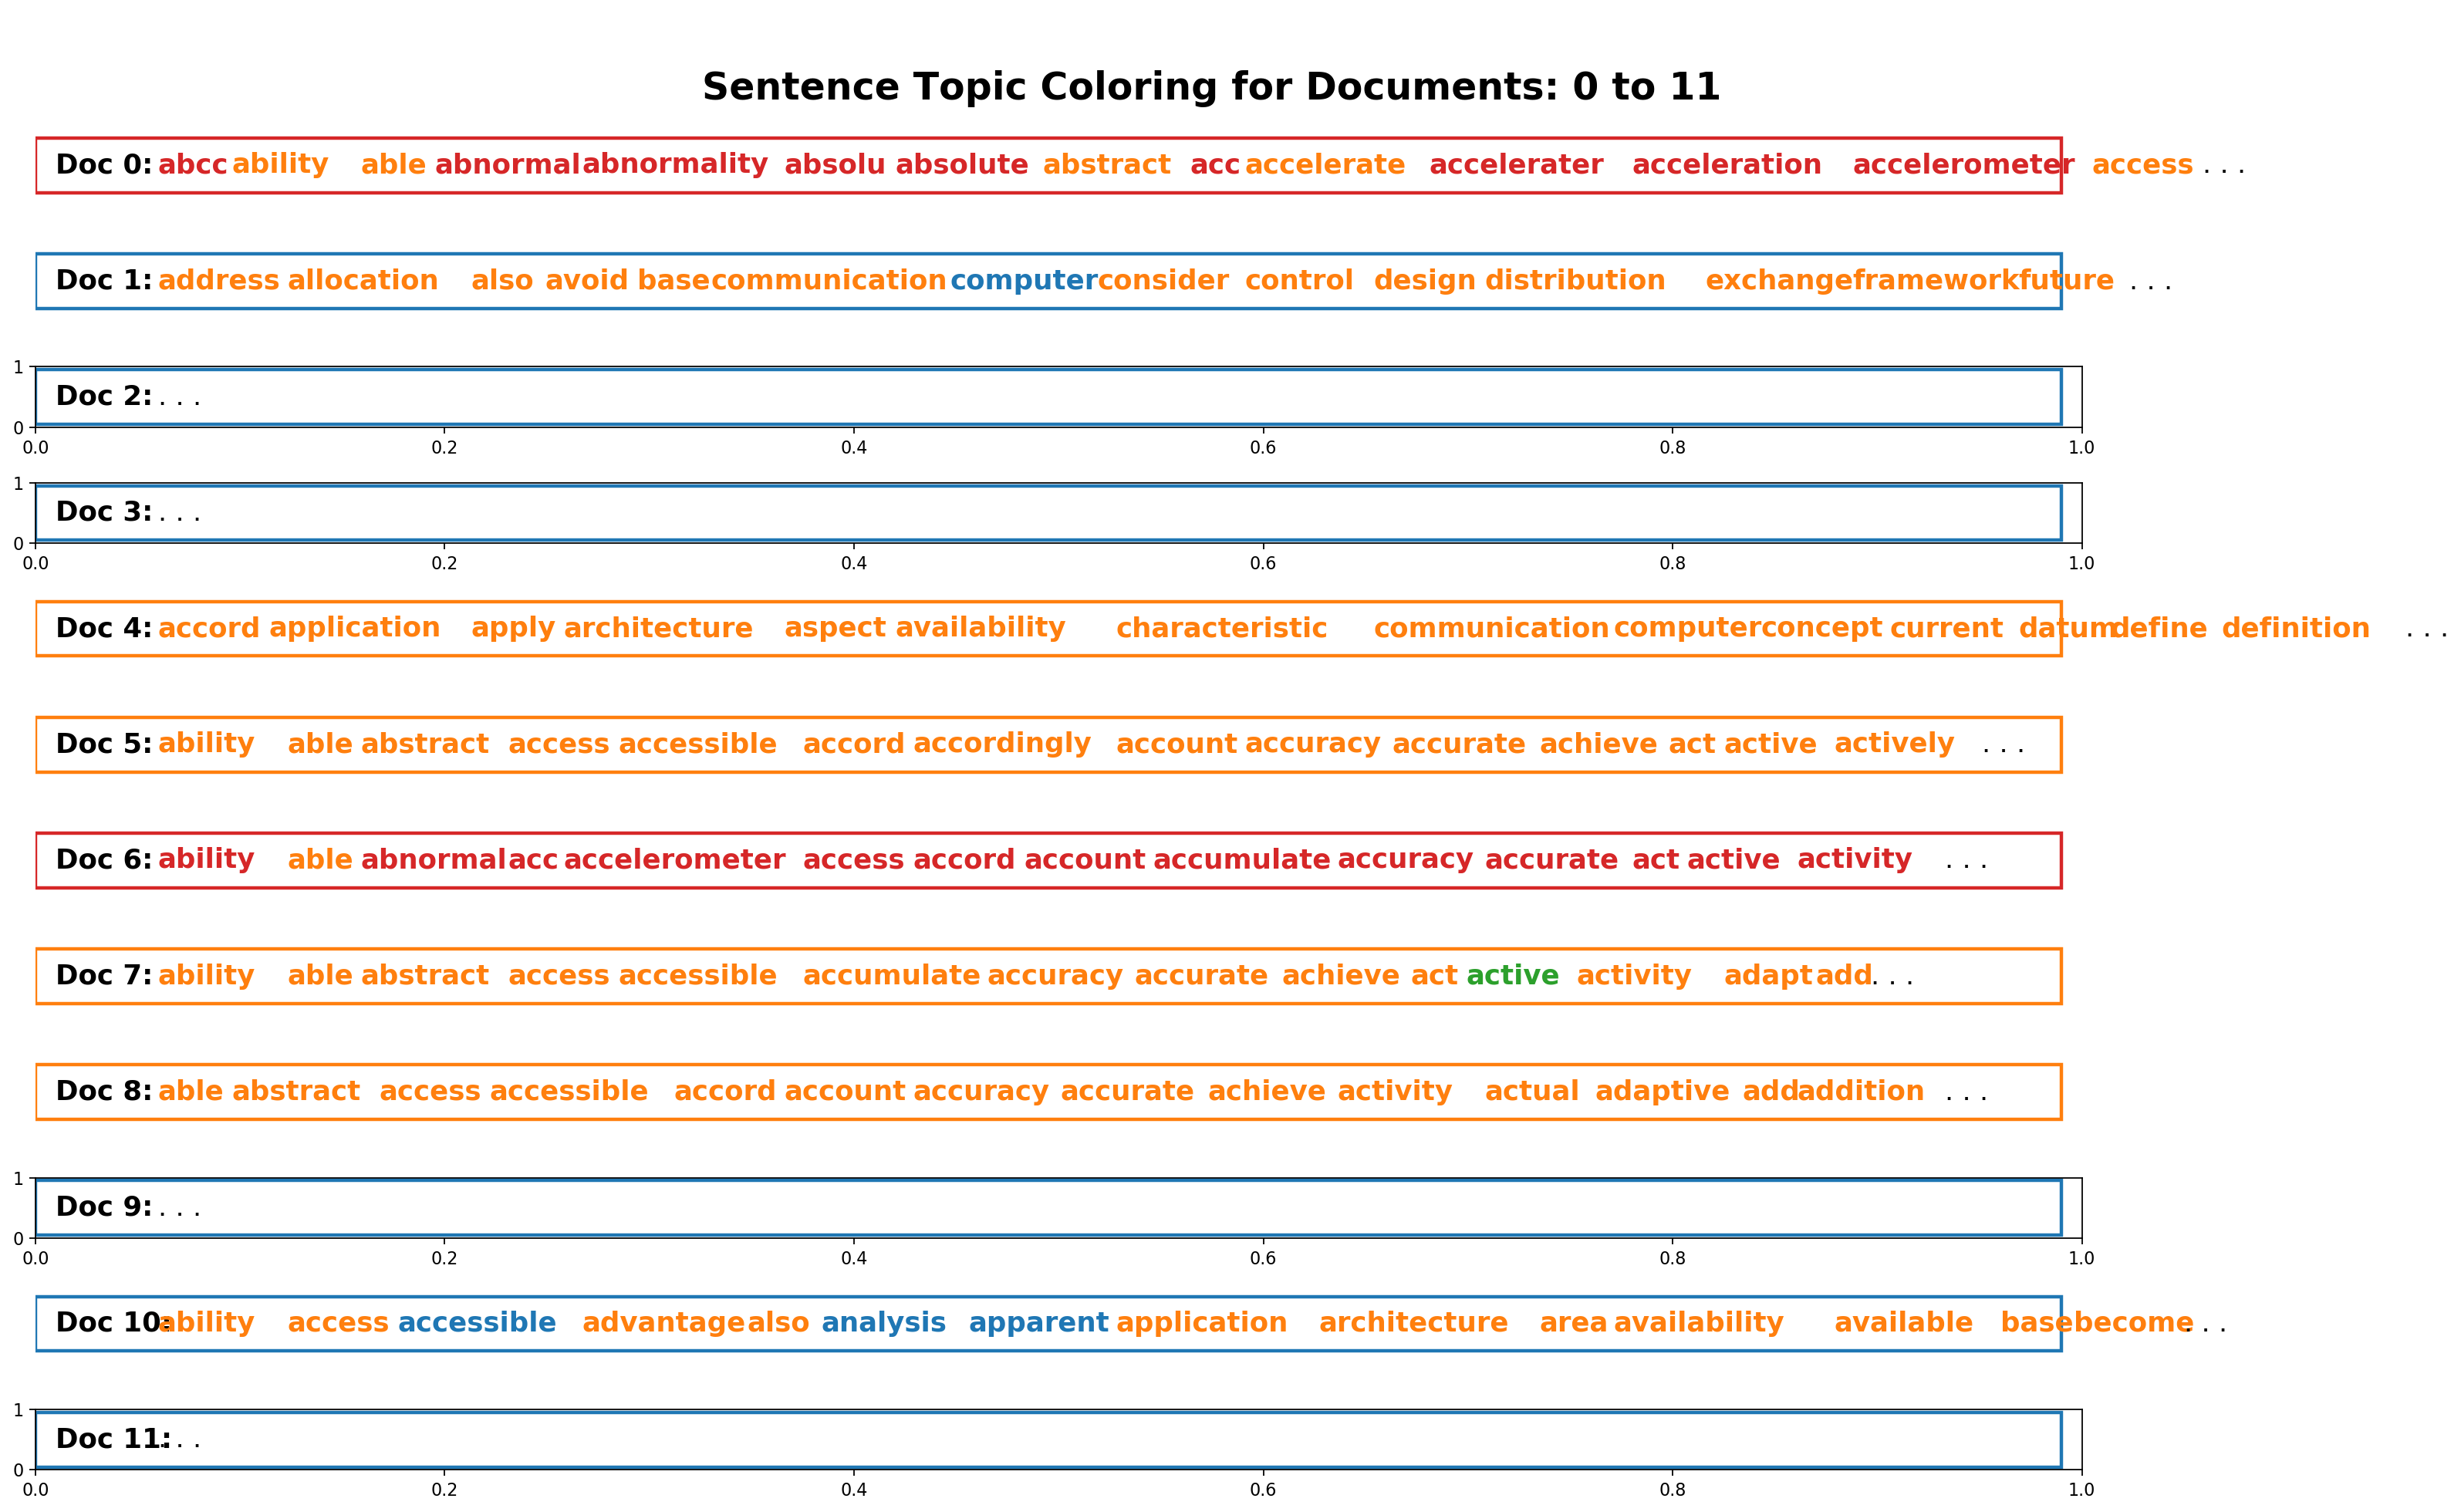

In [27]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

In [28]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)


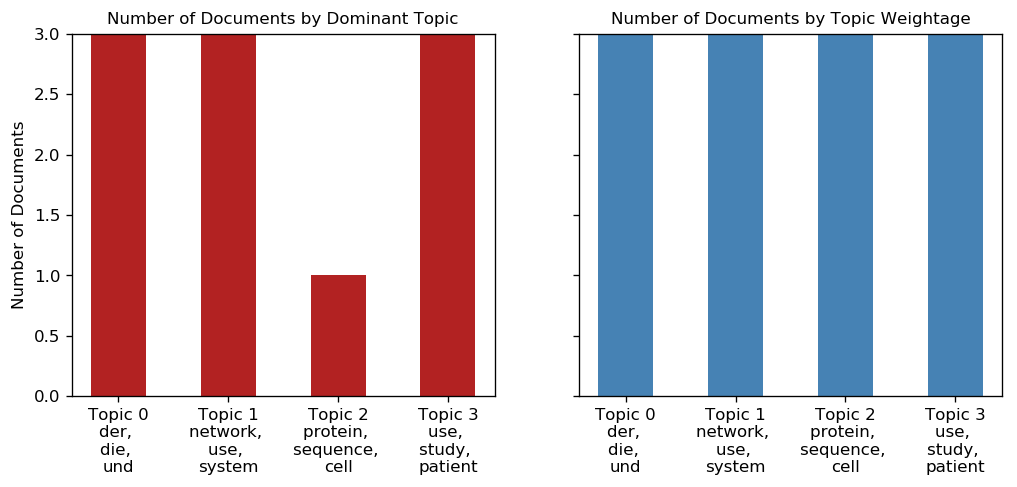

In [29]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 3)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [30]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 48 nearest neighbors...
[t-SNE] Indexed 49 samples in 0.000s...
[t-SNE] Computed neighbors for 49 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 49 / 49
[t-SNE] Mean sigma: 0.493170
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.920471
[t-SNE] KL divergence after 1000 iterations: 0.250444


Loading BokehJS ...

In [31]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.222180 -0.064044       1        1  72.912621
3      0.109743  0.071653       2        1  16.277952
0     -0.183848 -0.146460       3        1   6.407805
2     -0.148075  0.138852       4        1   4.401632, topic_info=      Category         Freq          Term        Total  loglift  logprob
term                                                                    
2395   Default   291.000000           der   291.000000  30.0000  30.0000
2396   Default   253.000000           die   253.000000  29.0000  29.0000
2458   Default   226.000000           und   226.000000  28.0000  28.0000
2278   Default  1716.000000           use  1716.000000  27.0000  27.0000
400    Default   562.000000      computer   562.000000  26.0000  26.0000
2083   Default   874.000000         study   874.000000  25.0000  25.0000
2123   Default  1468.000000        system  1468.000000  24.0000  24.0000
1412   Default  1526.000000       network  1526.000000  23.0000  23.0000
1536   Default   290.000000       patient   290.000000  22.0000  22.0000
1692   Default   180.000000       protein   180.000000  21.0000  21.0000
1112   Default   439.000000      internet   439.000000  20.0000  20.0000
1944   Default   173.000000      sequence   173.000000  19.0000  19.0000
2081   Default   277.000000     structure   277.000000  18.0000  18.0000
98     Default   505.000000      analysis   505.000000  17.0000  17.0000
292    Default   174.000000          cell   174.000000  16.0000  16.0000
2340   Default   355.000000           web   355.000000  15.0000  15.0000
903    Default   164.000000          gene   164.000000  14.0000  14.0000
521    Default   967.000000         datum   967.000000  13.0000  13.0000
1070   Default   679.000000   information   679.000000  12.0000  12.0000
194    Default  1126.000000          base  1126.000000  11.0000  11.0000
2401   Default    86.000000          eine    86.000000  10.0000  10.0000
1164   Default   114.000000            la   114.000000   9.0000   9.0000
886    Default   227.000000      function   227.000000   8.0000   8.0000
1117   Default   151.000000  intervention   151.000000   7.0000   7.0000
3567   Default    78.000000           das    78.000000   6.0000   6.0000
827    Default   196.000000        factor   196.000000   5.0000   5.0000
3738   Default    67.000000           fur    67.000000   4.0000   4.0000
1019   Default   262.000000      identify   262.000000   3.0000   3.0000
2393   Default    64.000000           den    64.000000   2.0000   2.0000
1314   Default   605.000000        method   605.000000   1.0000   1.0000
...        ...          ...           ...          ...      ...      ...
16466   Topic4     7.208348  dense_breast     7.963768   3.0235  -6.9910
16707   Topic4     7.208348           oua     7.963768   3.0235  -6.9910
16864   Topic4     7.208348    transposon     7.963768   3.0235  -6.9910
16849   Topic4     7.208348        tendon     7.963768   3.0235  -6.9910
16590   Topic4     7.208348      immunity     7.963768   3.0235  -6.9910
3850    Topic4    18.477020     inhibitor    22.528835   2.9249  -6.0497
4269    Topic4     8.747295          skin     9.903191   2.9991  -6.7975
9864    Topic4    20.779041      protease    28.870117   2.7943  -5.9323
3656    Topic4    23.196619        enzyme    33.966560   2.7418  -5.8223
10856   Topic4    13.062035        plasma    17.010380   2.8591  -6.3966
10669   Topic4    17.310310    activation    28.068089   2.6399  -6.1150
7531    Topic4    10.444864       closure    13.570826   2.8614  -6.6202
1692    Topic4    54.347843       protein   180.303223   1.9240  -4.9709
2189    Topic4    15.290864        tissue    27.521931   2.5355  -6.2390
1944    Topic4    37.798576      sequence   173.572601   1.5989  -5.3340
292     Topic4    31.334503          cell   174.644791   1.4052  -5.5215
1164    Topic4    19.963236            la   114.668121  